In [199]:
!pip install streamlit

In [547]:
!pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 1.7 MB/s eta 0:01:01
   ---------------------------------------- 0.2/99.8 MB 1.5 MB/s eta 0:01:06
   ---------------------------------------- 0.3/99.8 MB 2.0 MB/s eta 0:00:51
   ---------------------------------------- 0.4/99.8 MB 2.3 MB/s eta 0:00:44
   ---------------------------------------- 0.5/99.8 MB 2.3 MB/s eta 0:00:44
   ---------------------------------------- 0.7/99.8 MB 2.5 MB/s eta 0:00:40
   ---------------------------------------- 0.7/99.8 MB 2.3 MB/s eta 0:00:43
   ---------------------------------------- 1.0/99.8 MB 2.7 MB/s eta 0:00:37
   ---------------------------------------- 1.1/99.8 MB 2.7 MB/s eta 0:00:37
    --------------------------------------- 1.4/99.8 MB 2.9 MB/s eta 0:00:34
    --------------------------------------- 1.4/99.8 MB 2.9 MB/s eta 0:00:34
    --------------------------------------- 1.5/99.8 MB 2.7 MB/s eta 0:00:37
    --

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#venev = toxic comment

In [422]:
df = pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [202]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [203]:
df.shape

(1303, 12)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [423]:
df.duplicated().sum()

0

In [424]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

#### Preprocessing

In [425]:
df.drop(columns=['Unnamed: 0'],inplace= True)

In [208]:
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832


In [426]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [427]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

#### EDA

C:\Users\saras\AppData\Local\Temp\ipykernel_17324\3419674267.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<AxesSubplot: xlabel='Price', ylabel='Density'>

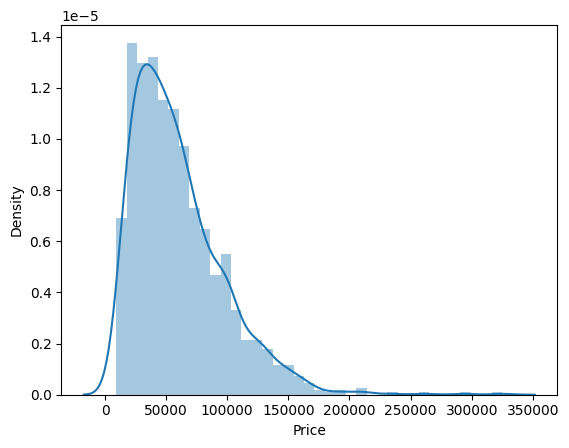

In [211]:
#Price distribution
sns.distplot(df['Price'])

In [212]:
#Price data is slightly left skewed

<AxesSubplot: >

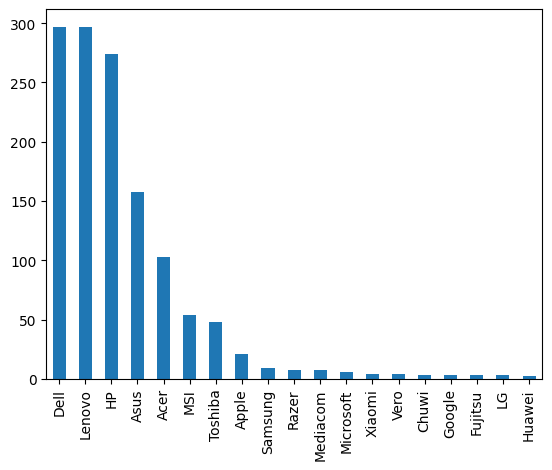

In [213]:
#No of laptops for each company
df['Company'].value_counts().plot(kind='bar')

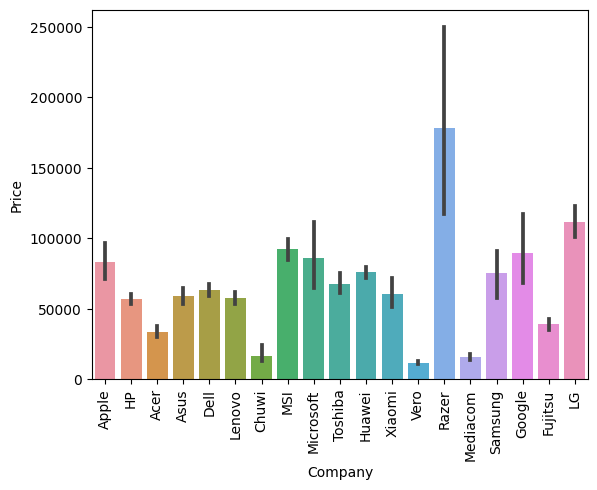

In [214]:
#Avg price per brand
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot: >

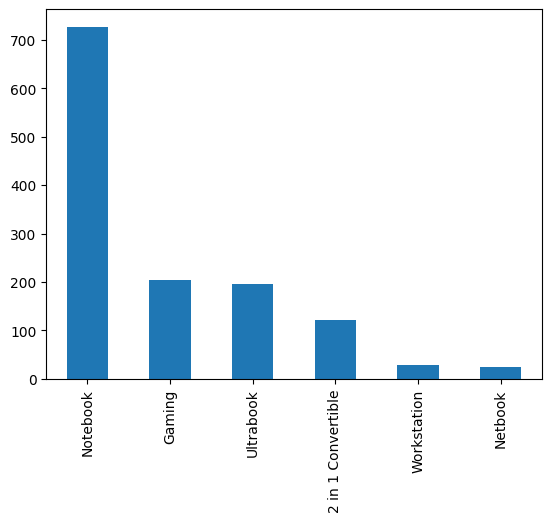

In [215]:
#No of types of laptops
df['TypeName'].value_counts().plot(kind='bar')

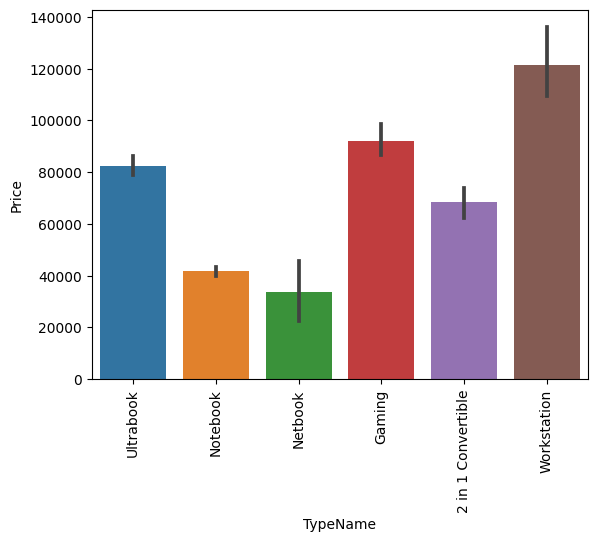

In [216]:
#Avg price per laptop type
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\saras\AppData\Local\Temp\ipykernel_17324\1637262596.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<AxesSubplot: xlabel='Inches', ylabel='Density'>

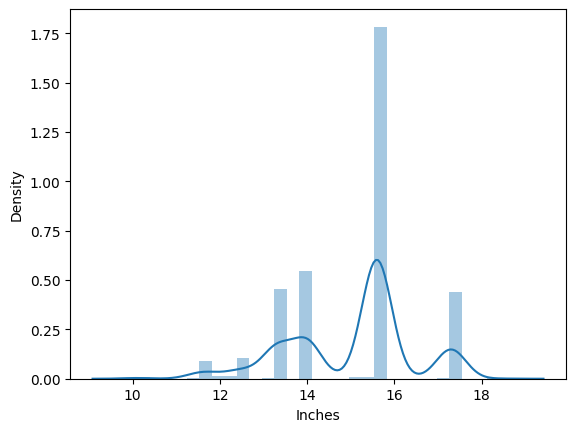

In [217]:
#Distribution of laptop sizes
sns.distplot(df['Inches'])

<AxesSubplot: xlabel='Inches', ylabel='Price'>

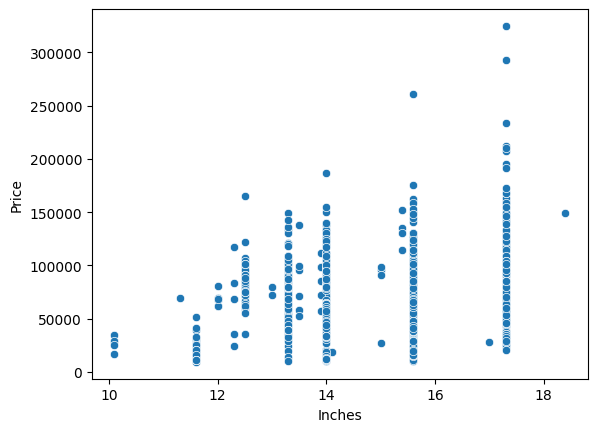

In [218]:
# relation b/w laptop sizes with price
sns.scatterplot(x=df['Inches'],y=df['Price'])

#### Feature Engineering

In [428]:
df['ScreenResolution'].value_counts(),len(df['ScreenResolution'].value_counts())

(Full HD 1920x1080                                507
 1366x768                                         281
 IPS Panel Full HD 1920x1080                      230
 IPS Panel Full HD / Touchscreen 1920x1080         53
 Full HD / Touchscreen 1920x1080                   47
 1600x900                                          23
 Touchscreen 1366x768                              16
 Quad HD+ / Touchscreen 3200x1800                  15
 IPS Panel 4K Ultra HD 3840x2160                   12
 IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
 4K Ultra HD / Touchscreen 3840x2160               10
 4K Ultra HD 3840x2160                              7
 Touchscreen 2560x1440                              7
 IPS Panel 1366x768                                 7
 IPS Panel Quad HD+ / Touchscreen 3200x1800         6
 IPS Panel Retina Display 2560x1600                 6
 IPS Panel Retina Display 2304x1440                 6
 Touchscreen 2256x1504                              6
 IPS Panel Touchscreen 2560x

In [429]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)

<AxesSubplot: >

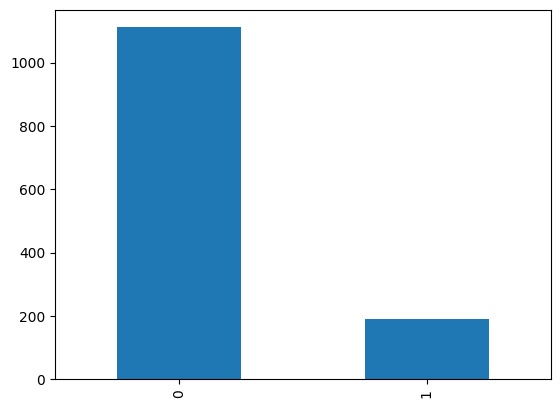

In [430]:
df['Touchscreen'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='Touchscreen', ylabel='Price'>

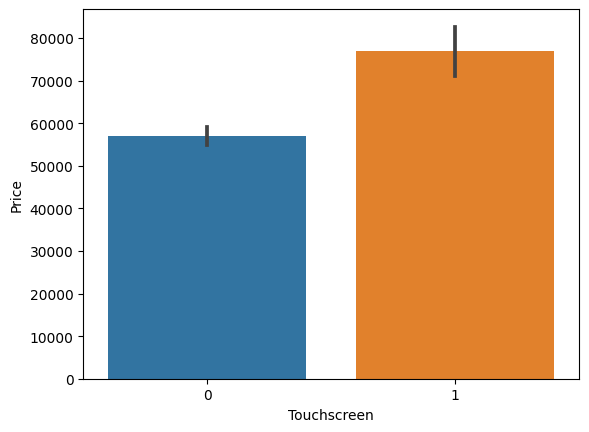

In [431]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [432]:
df['IPS Panel'] = df['ScreenResolution'].apply(lambda x : 1 if 'IPS Panel' in x else 0)

<AxesSubplot: >

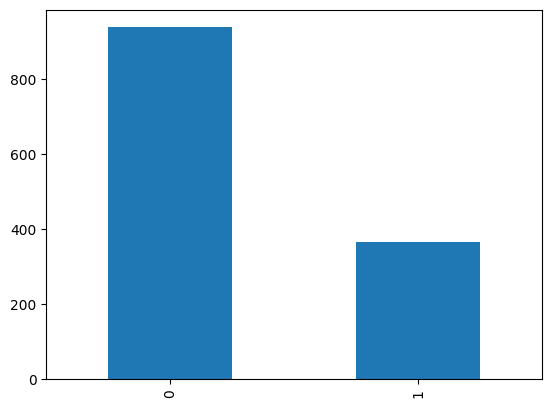

In [433]:
df['IPS Panel'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='IPS Panel', ylabel='Price'>

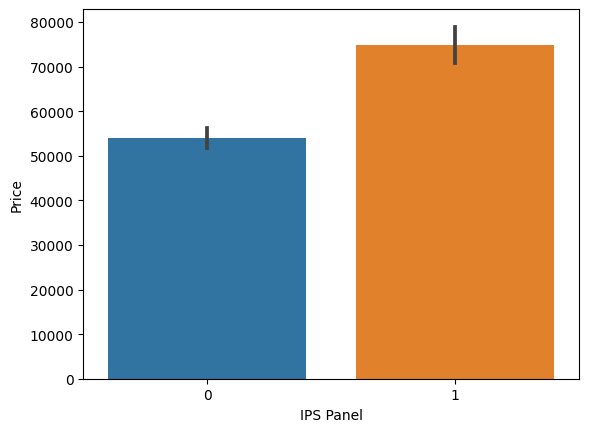

In [434]:
sns.barplot(x=df['IPS Panel'],y=df['Price'])

In [435]:
df['Y_res'] = df['ScreenResolution'].str.split('x').str[1]

In [436]:
df['X_res'] = df['ScreenResolution'].str.split('x').str[0]

In [437]:
df[['X_res']].value_counts()

X_res                                   
Full HD 1920                                507
1366                                        281
IPS Panel Full HD 1920                      231
IPS Panel Full HD / Touchscreen 1920         53
Full HD / Touchscreen 1920                   47
1600                                         23
Touchscreen 1366                             16
Quad HD+ / Touchscreen 3200                  15
IPS Panel 4K Ultra HD 3840                   12
IPS Panel 4K Ultra HD / Touchscreen 3840     11
4K Ultra HD / Touchscreen 3840               10
Touchscreen 2560                              7
4K Ultra HD 3840                              7
IPS Panel 1366                                7
Touchscreen 2256                              6
IPS Panel Quad HD+ / Touchscreen 3200         6
IPS Panel Retina Display 2304                 6
IPS Panel Retina Display 2560                 6
IPS Panel Touchscreen 2560                    5
IPS Panel 2560                                4

In [438]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])

In [439]:
df['X_res'] = df['X_res'].astype('int32')
df['Y_res'] = df['Y_res'].astype('int32')

In [440]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS Panel      0.252208
Y_res          0.552809
X_res          0.556529
Name: Price, dtype: float64

In [441]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [442]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS Panel      0.252208
Y_res          0.552809
X_res          0.556529
ppi            0.473487
Name: Price, dtype: float64

In [443]:
df.drop(columns = ['ScreenResolution','X_res','Y_res','Inches'],inplace=True)

In [444]:
df.head(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940


In [445]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [446]:
df['Cpu Name'] = df['Cpu'].apply(lambda x :" ".join(x.split()[0:3]))

In [447]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [448]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

<AxesSubplot: >

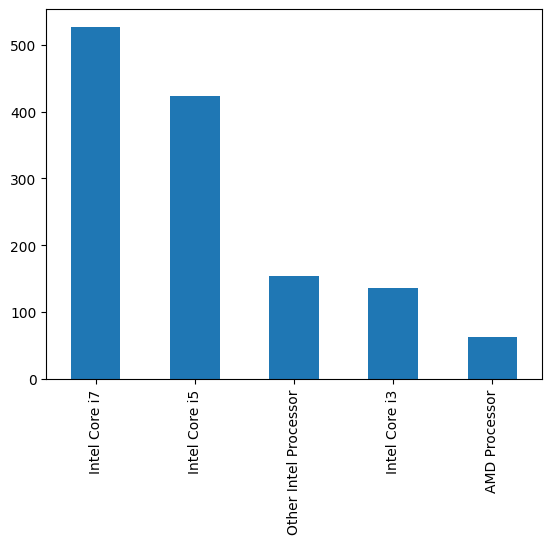

In [449]:
df['Cpu brand'].value_counts().plot(kind ='bar')

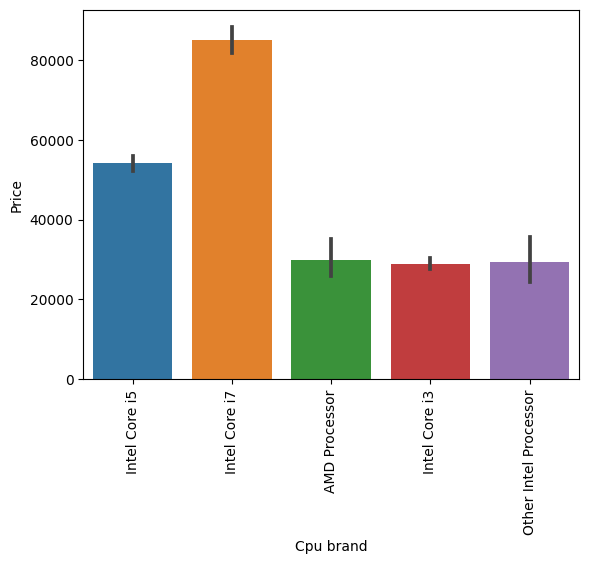

In [450]:
sns.barplot(x=df['Cpu brand'], y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [451]:
df.drop(columns =['Cpu','Cpu Name'],inplace=True)

In [452]:
df.head(1)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5


<AxesSubplot: >

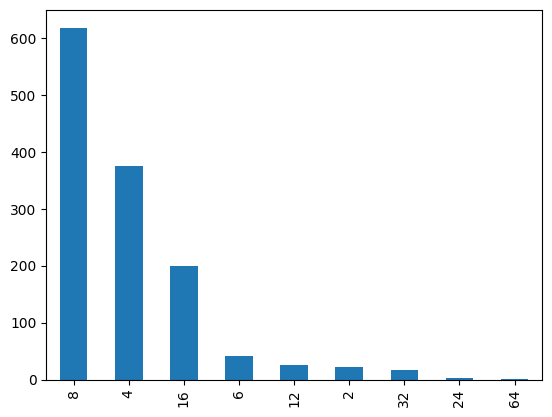

In [453]:
df['Ram'].value_counts().plot(kind='bar')

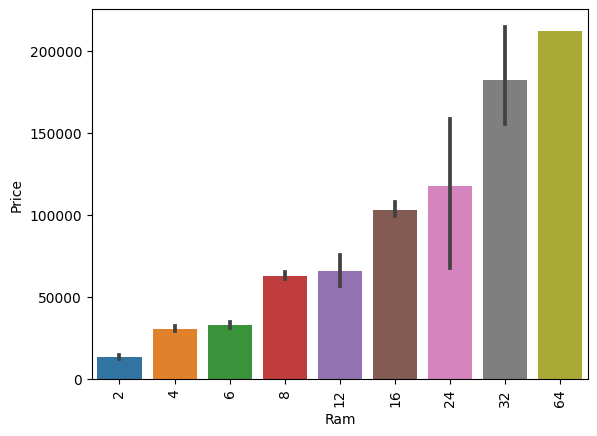

In [454]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [455]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [456]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\saras\AppData\Local\Temp\ipykernel_17324\4023190604.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
C:\Users\saras\AppData\Local\Temp\ipykernel_17324\4023190604.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [457]:
df.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128


In [458]:
df.drop(columns=['Memory'],inplace=True)

In [459]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS Panel        0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [460]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [461]:
df.head(3)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256


In [462]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [463]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [464]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [465]:
df = df[df['Gpu brand']!='ARM']

In [466]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

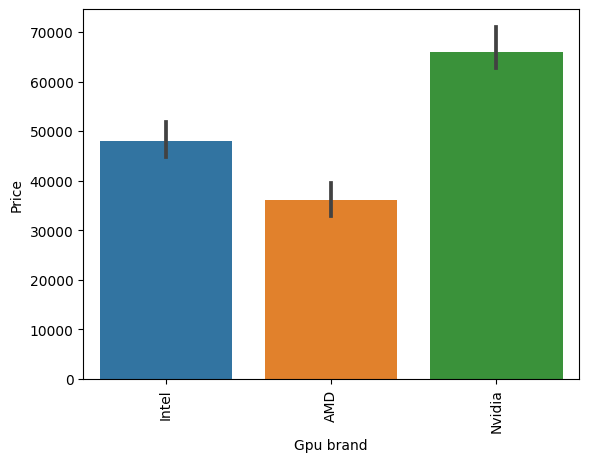

In [467]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [468]:
df.head(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel


In [469]:
df.drop(columns=['Gpu'],inplace=True)

In [470]:
df.head(2)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS Panel,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel


In [471]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [472]:
def classify_OS(text):
    if text == 'Windows 10' or text == 'Windows 7' or text == 'Windows 10 S':
        return 'Windows'
    elif text == 'macOS' or text == 'Mac OS X':
        return 'macOS'
    else:
        return 'Others/No OS/Linux' 

In [473]:
df['os'] = df['OpSys'].apply(classify_OS)

In [474]:
df.head(2)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS Panel,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,macOS
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,macOS


In [475]:
df.drop(columns = ['OpSys'],inplace = True)

In [476]:
df.head(2)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS Panel,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,macOS
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,macOS


<AxesSubplot: xlabel='os', ylabel='Price'>

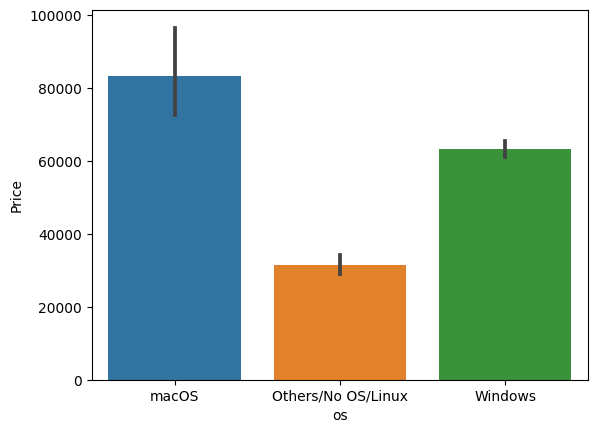

In [477]:
sns.barplot(x=df.os,y=df.Price)

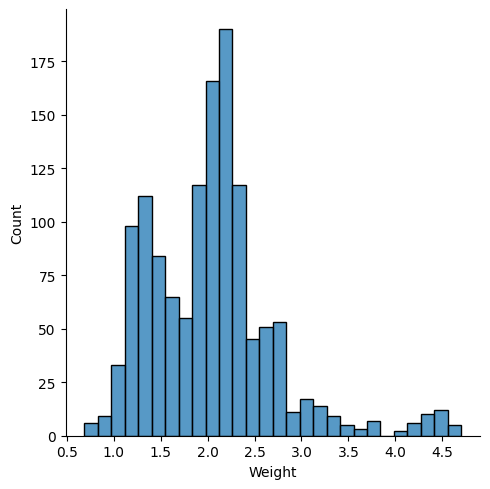

In [478]:
sns.displot(df.Weight )

<AxesSubplot: >

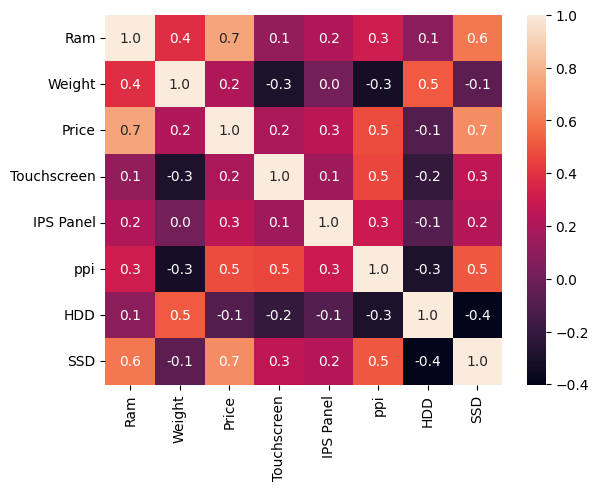

In [479]:
sns.heatmap(df.corr(),annot = True,fmt = ".1f")

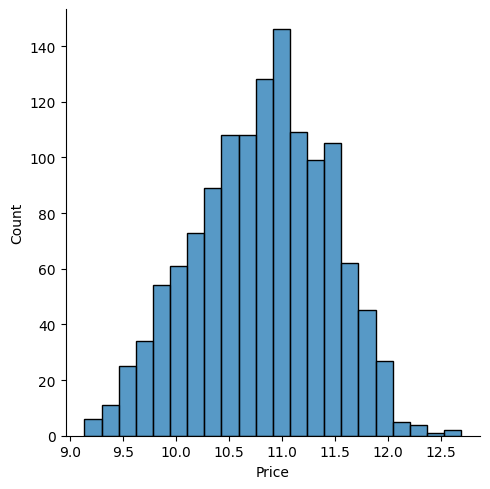

In [480]:
#Applying log transformation as original price distribution is skewed
sns.displot(np.log(df.Price))

In [481]:
df.head(2)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS Panel,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,macOS
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,macOS


In [573]:
df.head(2)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS Panel,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,macOS
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,macOS


In [574]:
X= df.drop(columns = ['Price'])

In [575]:
y=np.log(df['Price'])

In [576]:
X.head(2)

,Company,TypeName,Ram,Weight,Touchscreen,IPS Panel,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,macOS
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,macOS


In [577]:
y.head(2)

0    11.175755
1    10.776777
Name: Price, dtype: float64

#### Scaling

In [578]:
#from sklearn.preprocessing import StandardScaler
#X[['Ram','Weight','ppi','SSD','HDD']] = StandardScaler().fit_transform(X[['Ram','Weight','ppi','SSD','HDD']])
#X.head(2)

#Scaling didnot give a better result


#### One Hot Encoding

In [579]:
ct = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')
X_ohe=ct.fit_transform(X)
X_ohe

array([[   1.        ,    0.        ,    0.        , ...,  226.98300468,
           0.        ,  128.        ],
       [   1.        ,    0.        ,    0.        , ...,  127.67794013,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,  141.21199808,
           0.        ,  256.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,  111.93520356,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,  100.45466986,
        1000.        ,    0.        ],
       [   0.        ,    1.        ,    0.        , ...,  100.45466986,
         500.        ,    0.        ]])

In [580]:
y.head(2)

0    11.175755
1    10.776777
Name: Price, dtype: float64

#### Train Test Split

In [581]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [583]:
X_train.head(2)

,Company,TypeName,Ram,Weight,Touchscreen,IPS Panel,ppi,Cpu brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.0,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.4,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows


In [584]:
y_train.head(2)

183     10.651384
1141    11.016798
Name: Price, dtype: float64

#### Model Training

In [585]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [586]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [587]:
# Linear regression
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8073277448418672
MAE 0.21017827976428477


In [588]:
np.exp(mean_absolute_error(y_test,y_pred))

1.2338980193970517

In [594]:
#RandomForestRegressor
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples = .5,
                              max_features =.75,
                              max_depth =15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8842678022532215
MAE 0.15992056393854862


#### Find best model and Hyperparameter tuning using GridSearchCV

In [590]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'RFRegressor': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50,100,150],
                'random_state': [3,10,100],
                'max_samples': [.5,2,5],
                'max_features': [.5,.75,2],
                'max_depth': [15,20,50]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['absolute_error','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'adaboost':{
            'model': AdaBoostRegressor(),
            'params':{
                'n_estimators': [15,50,100,150],
                'learning_rate':[1,3,5]
            }
        },
        'xgboost':{
            'model': XGBRegressor(),
            'params':{
                'n_estimators': [15,50,100,150],
                'learning_rate':[.5,1,3,5],
                'max_depth': [5,15,20,50]
             }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_model_using_gridsearchcv(X_ohe,y)



c:\Users\saras\steffysara\VS_Code_Projects\Comment_Toxicity_Classifier\venv\lib\site-packages\sklearn\model_selection\_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\saras\steffysara\VS_Code_Projects\Comment_Toxicity_Classifier\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\saras\steffysara\VS_Code_Projects\Comment_Toxicity_Classifier\venv\lib\site-packages\sklearn\metrics\_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\saras\steffysara\VS_Code_Projects\Comment_Toxicity_Classifier\venv\lib\site-packages\sklearn\base.py", line 849, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "c:\Users\saras\steffysara\VS_Code_Projects\Comment_Toxicity_Classifier\venv\li

,model,best_score,best_params
0,linear_regression,0.806329,{'fit_intercept': True}
1,RFRegressor,0.876966,"{'max_depth': 20, 'max_features': 0.75, 'max_s..."
2,decision_tree,0.797638,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
3,adaboost,0.805473,"{'learning_rate': 3, 'n_estimators': 100}"
4,xgboost,0.882205,"{'learning_rate': 0.5, 'max_depth': 5, 'n_esti..."


RandomForest Regressor is chosen as the best model with a R2 score of 88.4%

#### Exporting the  best model

In [593]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))